In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# Confidence Interval

In [2]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [3]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

In [4]:
n = 6

In [7]:
np.random.choice(survey_1, size=n) # sampling with replacement

array([37, 33, 36, 37, 36, 36])

In [36]:
bootstrapped_samples = np.random.choice(survey_1, size=n)
print(bootstrapped_samples)
np.mean(bootstrapped_samples)

[37 36 36 37 35 35]


36.0

In [53]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

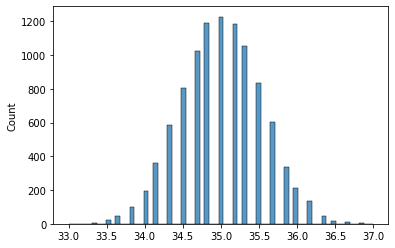

In [54]:
sns.histplot(bootstrapped_means_survey_1)

In [48]:
bootstrapped_samples = np.random.choice(survey_2, size=n)
print(bootstrapped_samples)
np.mean(bootstrapped_samples)

[33 37 50 37 50 37]


40.666666666666664

In [55]:
bootstrapped_means_survey_2 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_2, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_2.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

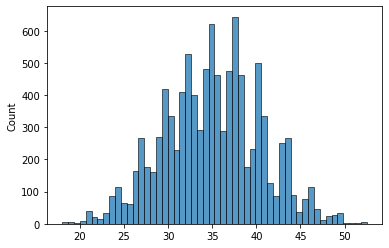

In [56]:
sns.histplot(bootstrapped_means_survey_2)

## 95% CI

In [59]:
np.percentile(bootstrapped_means_survey_1, [2.5, 97.5])

array([34., 36.])

In [60]:
np.percentile(bootstrapped_means_survey_2, [2.5, 97.5])

array([24., 46.])

## 99% CI

In [61]:
np.percentile(bootstrapped_means_survey_1, [0.5, 99.5])

array([33.66666667, 36.33333333])

In [62]:
np.percentile(bootstrapped_means_survey_2, [0.5, 99.5])

array([21.16666667, 49.16666667])

# Central Limit Theorem

In [63]:
sehwag = pd.read_csv("sehwag.csv")

In [64]:
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [65]:
sehwag["Runs"].mean() # population mean

33.76734693877551

In [152]:
sehwag["Runs"].std() # population std dev

34.80941899427947

In [72]:
sehwag["Runs"].sample(5)

51     23
48      0
81      3
13      4
136     5
Name: Runs, dtype: int64

In [116]:
num_samples = 10 # Run with diff values to test variance in answer
sehwag["Runs"].sample(num_samples).mean()

40.9

If num_samples is high, we expect low variance

## Sample mean trend

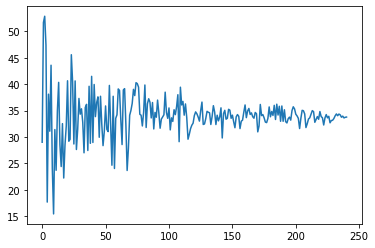

In [135]:
sample_mean_trend = []

for num_samples in range(5, 246):
    sample = sehwag["Runs"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_mean_trend.append(sample_mean)
plt.plot(sample_mean_trend)

Text(0, 0.5, 'Sample mean')

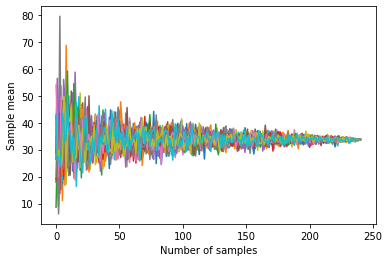

In [136]:
sample_mean_trend = []
for person in range(20):
    for num_samples in range(5, 246):
        sample = sehwag["Runs"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)
    sample_mean_trend = [] # next person starts afresh
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")

<AxesSubplot:ylabel='Count'>

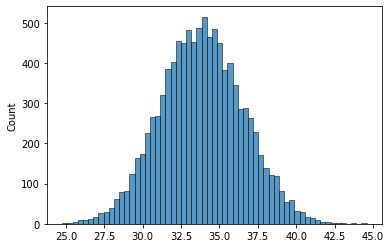

In [150]:
num_samples = 100
collect_sample_means = []
for person in range(10000):
    sample_mean = sehwag["Runs"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

## Confidence interval

In [154]:
norm.ppf(0.025)

-1.9599639845400545

In [155]:
norm.ppf(0.975)

1.959963984540054

In [162]:
n = 40
sehwag["Runs"].sample(n).mean()

36.675

<AxesSubplot:xlabel='Runs', ylabel='Count'>

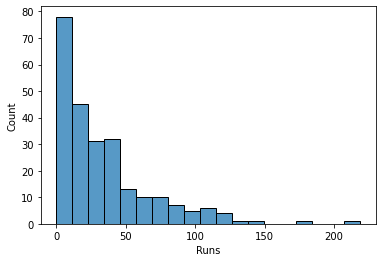

In [163]:
sns.histplot(sehwag["Runs"])